

## TASK 2- All you need is a Indicator:



## Introduction:
Algorithmic trading relies on technical indicators to make informed trading decisions. In this task, we aim to code various indicators such as SMA, EMA, MACD, OBV, and Bollinger Bands from scratch in Python. These indicators will be integrated to create new features for predicting buy, sell, or hold decisions for Nifty50 stocks. By extracting OHLC data using yfinance and calculating these indicators, we can construct a target variable and build a multivariate logistic regression model to predict trading decisions. The model's performance will be evaluated using metrics such as F1 score, accuracy, and AUC-ROC score, providing insights into the effectiveness of the trading strategy.


## Data Extraction:


[*********************100%%**********************]  1 of 1 completed


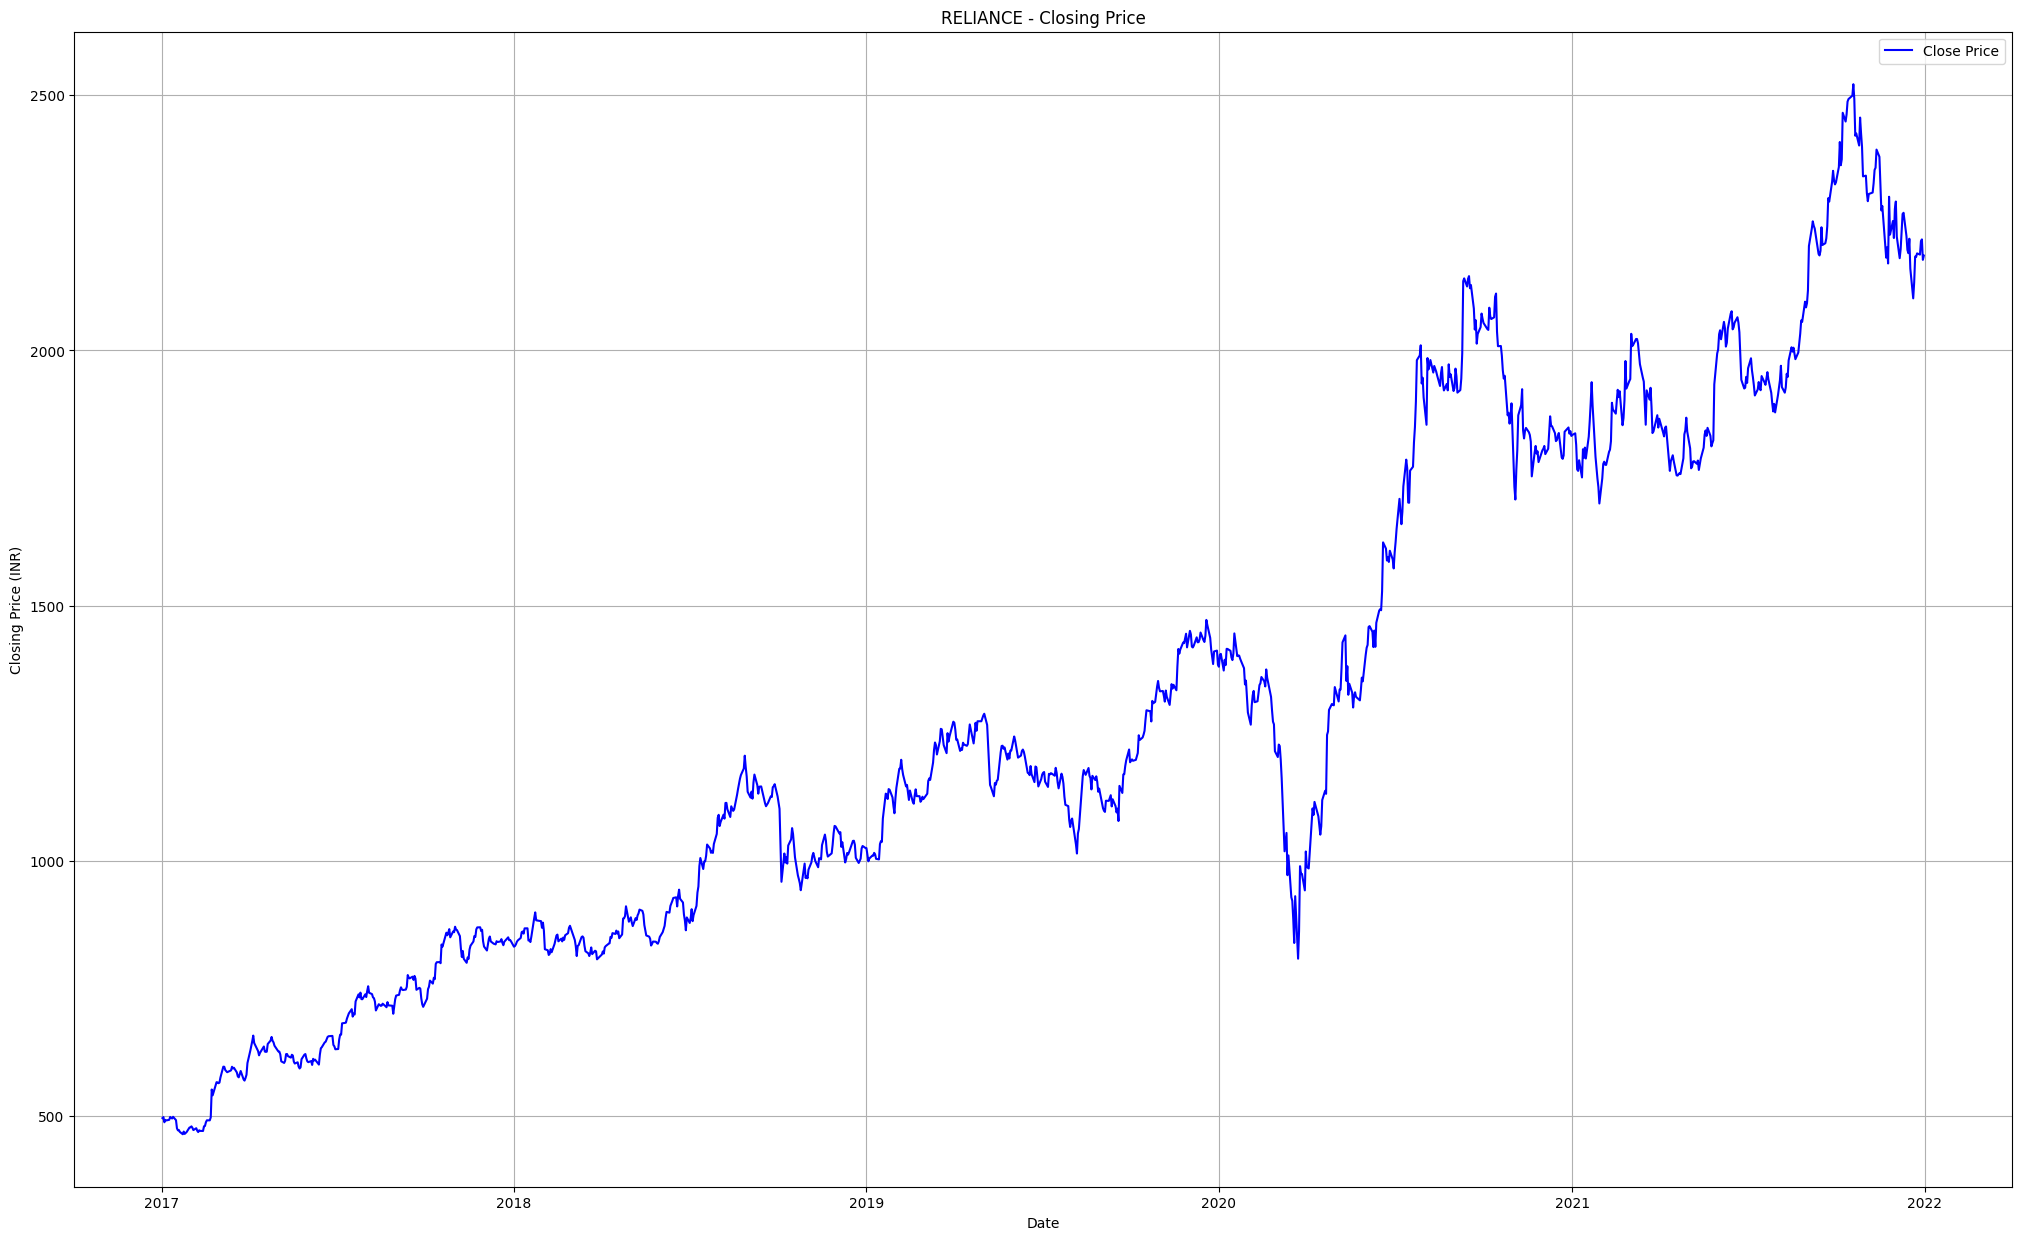

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919


In [1]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Data Extraction and Explanation
# Extracting data for Reliance Industries Limited (RELIANCE.NS) with daily timeframe for the past 5 years
ticker = "RELIANCE.NS"
start_date = "2017-01-01"
end_date = "2022-01-01"
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Plotting the closing price
plt.figure(figsize=(25, 15))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title('RELIANCE - Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# Displaying the extracted data
data.head()

Selecting a specific stock, such as RELIANCE.NS (Reliance Industries Limited) from the Nifty50 index, requires careful consideration. Here are five reasons why one might choose RELIANCE.NS:

1.Market Capitalization and Liquidity: Reliance Industries Limited is one of the largest companies in India by market capitalization. Its large market cap ensures higher liquidity in trading, making it easier to enter and exit positions without significant price impact. This liquidity is crucial for algorithmic trading strategies that rely on frequent trading.

2.Diverse Business Segments: Reliance Industries operates in various sectors, including petrochemicals, refining, oil & gas exploration, retail, and telecommunications (Reliance Jio). This diversity provides exposure to multiple industries, reducing the risk associated with sector-specific fluctuations. It also offers ample opportunities for trading strategies based on different market conditions across sectors.

3.Volatility and Price Movements: RELIANCE.NS is known for its significant price movements and volatility. For algorithmic trading, volatility is desirable as it provides opportunities for profit through price fluctuations. Higher volatility often leads to larger price swings, allowing for more substantial gains if the trading strategy can effectively capture these movements.

4.Information Availability: Reliance Industries Limited is a widely followed and analyzed stock in India. As such, there is ample information available about the company, including financial reports, news, analyst recommendations, and market sentiment. Access to abundant information is vital for algorithmic trading, as it allows traders to make informed decisions and incorporate relevant data into their models.

5.Influence on Index Performance: Being part of the Nifty50 index, the performance of RELIANCE.NS significantly impacts the overall movement of the index. As a result, traders often pay close attention to Reliance Industries' stock price movements when analyzing broader market trends. This heightened attention can lead to increased trading opportunities and liquidity, especially for algorithmic strategies that capitalize on index movements and correlations.

These reasons make RELIANCE.NS an attractive choice for algorithmic trading strategies, offering ample liquidity, volatility, information availability, and influence on market indices. However, it's essential to conduct thorough analysis and consider specific trading objectives and risk factors before selecting any stock for trading purposes.

-timeframe => daily

## Indicators used with reasons

## Simple Moving Average (SMA)
SMA is a widely used trend-following indicator that helps smooth out price data by creating a constantly updated average price. It can provide insights into the direction of the trend, indicating potential buy or sell signals when prices cross above or below the SMA.

In [2]:
def calculate_sma(data, window=20):
    return data['Close'].rolling(window=window).mean()
data['SMA']=calculate_sma(data, window=20)
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA
Date,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN


## Relative Strength Index(RSI)
RSI is a momentum oscillator that measures the speed and change of price movements. It oscillates between 0 and 100 and is typically used to identify overbought or oversold conditions in a stock. RSI values above 70 indicate overbought conditions, suggesting a potential reversal, while values below 30 indicate oversold conditions, suggesting a possible bounce back in price.

In [3]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
data['RSI']=calculate_rsi(data, window=14)
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI
Date,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN


## Moving Average Convergence Divergence(MACD) 
MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. It consists of the MACD line (the difference between a short-term and long-term moving average) and the signal line (a moving average of the MACD line). MACD crossovers and divergences can signal potential buy or sell opportunities.

In [4]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, min_periods=1, adjust=False).mean()
    return macd_line, signal_line
data['MACDLINE'],data['SIGNALLINE']=calculate_macd(data, short_window=12, long_window=26, signal_window=9)
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE
Date,,,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN,0.000000,0.000000
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN,0.156815,0.031363
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN,-0.533548,-0.081619
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN,-0.694542,-0.204204
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN,-0.902112,-0.343785


## Bollinger Bands
 Bollinger Bands consist of a simple moving average (usually 20 periods) and two standard deviations plotted above and below the SMA. Bollinger Bands expand and contract based on volatility, providing a visual representation of price volatility. Traders often use Bollinger Bands to identify overbought or oversold conditions and potential price breakouts.

In [5]:
def calculate_bb(data, window=20, num_std_dev=2):
    sma = data['Close'].rolling(window=window).mean()
    std = data['Close'].rolling(window=window).std()
    upper_band = sma + num_std_dev * std
    lower_band = sma - num_std_dev * std
    return upper_band, lower_band
data['Upper_Band'], data['Lower_Band']=calculate_bb(data, window=20, num_std_dev=2)
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE,Upper_Band,Lower_Band
Date,,,,,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN,0.000000,0.000000,NaN,NaN
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN,0.156815,0.031363,NaN,NaN
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN,-0.533548,-0.081619,NaN,NaN
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN,-0.694542,-0.204204,NaN,NaN
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN,-0.902112,-0.343785,NaN,NaN


## Standard deviation
 Calculate the standard deviation of price over a certain period to assess volatility.

In [6]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the relevant column
data['std'] = data['Close'].std()

data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE,Upper_Band,Lower_Band,std
Date,,,,,,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN,0.000000,0.000000,NaN,NaN,519.630009
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN,0.156815,0.031363,NaN,NaN,519.630009
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN,-0.533548,-0.081619,NaN,NaN,519.630009
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN,-0.694542,-0.204204,NaN,NaN,519.630009
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN,-0.902112,-0.343785,NaN,NaN,519.630009


## On Balance Volume (OBV)
OBV is a cumulative indicator that uses volume flow to predict changes in stock price. It adds or subtracts the volume based on whether the price moves up or down, respectively. Rising OBV indicates positive buying pressure and suggests that the price may continue to rise, while falling OBV suggests selling pressure and potential price decline.

In [7]:
def calculate_obv(data):
    obv = (data['Close'].diff() > 0).astype(int)
    obv = obv.replace(0, -1)
    obv = obv * data['Volume']
    obv = obv.cumsum()
    return obv
data['OBV']=calculate_obv(data)
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE,Upper_Band,Lower_Band,std,OBV
Date,,,,,,,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN,0.000000,0.000000,NaN,NaN,519.630009,-3548944
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN,0.156815,0.031363,NaN,NaN,519.630009,-331842
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN,-0.533548,-0.081619,NaN,NaN,519.630009,-5528083
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN,-0.694542,-0.204204,NaN,NaN,519.630009,-1161001
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN,-0.902112,-0.343785,NaN,NaN,519.630009,-5083920


## Feature Engineering part

# MACD histogram
The MACD indicator is basically a ocsillator taht ocsillates between  two moving averages. The MACD line amd the signal line difference basically indicates how t=is the codition of the stock 

In [8]:
def MACD_Histogram(data):
    return data['MACDLINE'] - data['SIGNALLINE']

data['MACDHISTOGRAM']=MACD_Histogram(data)
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE,Upper_Band,Lower_Band,std,OBV,MACDHISTOGRAM
Date,,,,,,,,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN,0.000000,0.000000,NaN,NaN,519.630009,-3548944,0.000000
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN,0.156815,0.031363,NaN,NaN,519.630009,-331842,0.125452
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN,-0.533548,-0.081619,NaN,NaN,519.630009,-5528083,-0.451928
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN,-0.694542,-0.204204,NaN,NaN,519.630009,-1161001,-0.490339
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN,-0.902112,-0.343785,NaN,NaN,519.630009,-5083920,-0.558327


# Volume Weighted Moving Average (VWMA)
The Volume Weighted Moving Average (VWMA) is a type of moving average that takes into account the volume traded at each price level. It gives more weight to periods with higher trading volume. 

In [9]:
def VWMA(data):
    return (data['Close'] * data['OBV']).rolling(window=20).mean()

data['VWMA']=VWMA(data)
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE,Upper_Band,Lower_Band,std,OBV,MACDHISTOGRAM,VWMA
Date,,,,,,,,,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN,0.000000,0.000000,NaN,NaN,519.630009,-3548944,0.000000,NaN
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN,0.156815,0.031363,NaN,NaN,519.630009,-331842,0.125452,NaN
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN,-0.533548,-0.081619,NaN,NaN,519.630009,-5528083,-0.451928,NaN
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN,-0.694542,-0.204204,NaN,NaN,519.630009,-1161001,-0.490339,NaN
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN,-0.902112,-0.343785,NaN,NaN,519.630009,-5083920,-0.558327,NaN


# Bollinger band width
Calculates the width of the Bollinger Bands (BB) to assess the volatility of the market.

In [10]:
def BB_width(data):
    return (data['High'] - data['Low']) / data['Close']
data['BBWIDTH']=BB_width(data)
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE,Upper_Band,Lower_Band,std,OBV,MACDHISTOGRAM,VWMA,BBWIDTH
Date,,,,,,,,,,,,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,479.061707,3548944,NaN,NaN,0.000000,0.000000,NaN,NaN,519.630009,-3548944,0.000000,NaN,0.016266
2017-01-03,498.242767,501.511505,494.242554,498.037018,480.960114,3217102,NaN,NaN,0.156815,0.031363,NaN,NaN,519.630009,-331842,0.125452,NaN,0.014595
2017-01-04,499.637115,499.682831,486.562164,487.865082,471.136993,5196241,NaN,NaN,-0.533548,-0.081619,NaN,NaN,519.630009,-5528083,-0.451928,NaN,0.026894
2017-01-05,489.625183,493.693939,488.596558,492.551025,475.662262,4367082,NaN,NaN,-0.694542,-0.204204,NaN,NaN,519.630009,-1161001,-0.490339,NaN,0.010349
2017-01-06,491.088104,496.025513,490.585205,491.430969,474.580566,3922919,NaN,NaN,-0.902112,-0.343785,NaN,NaN,519.630009,-5083920,-0.558327,NaN,0.011070


## Generating training output
 The function that for the initial 80% data sets  signal sell if its local maximum  buy for local minima and sell for  local maxima and hold for rest

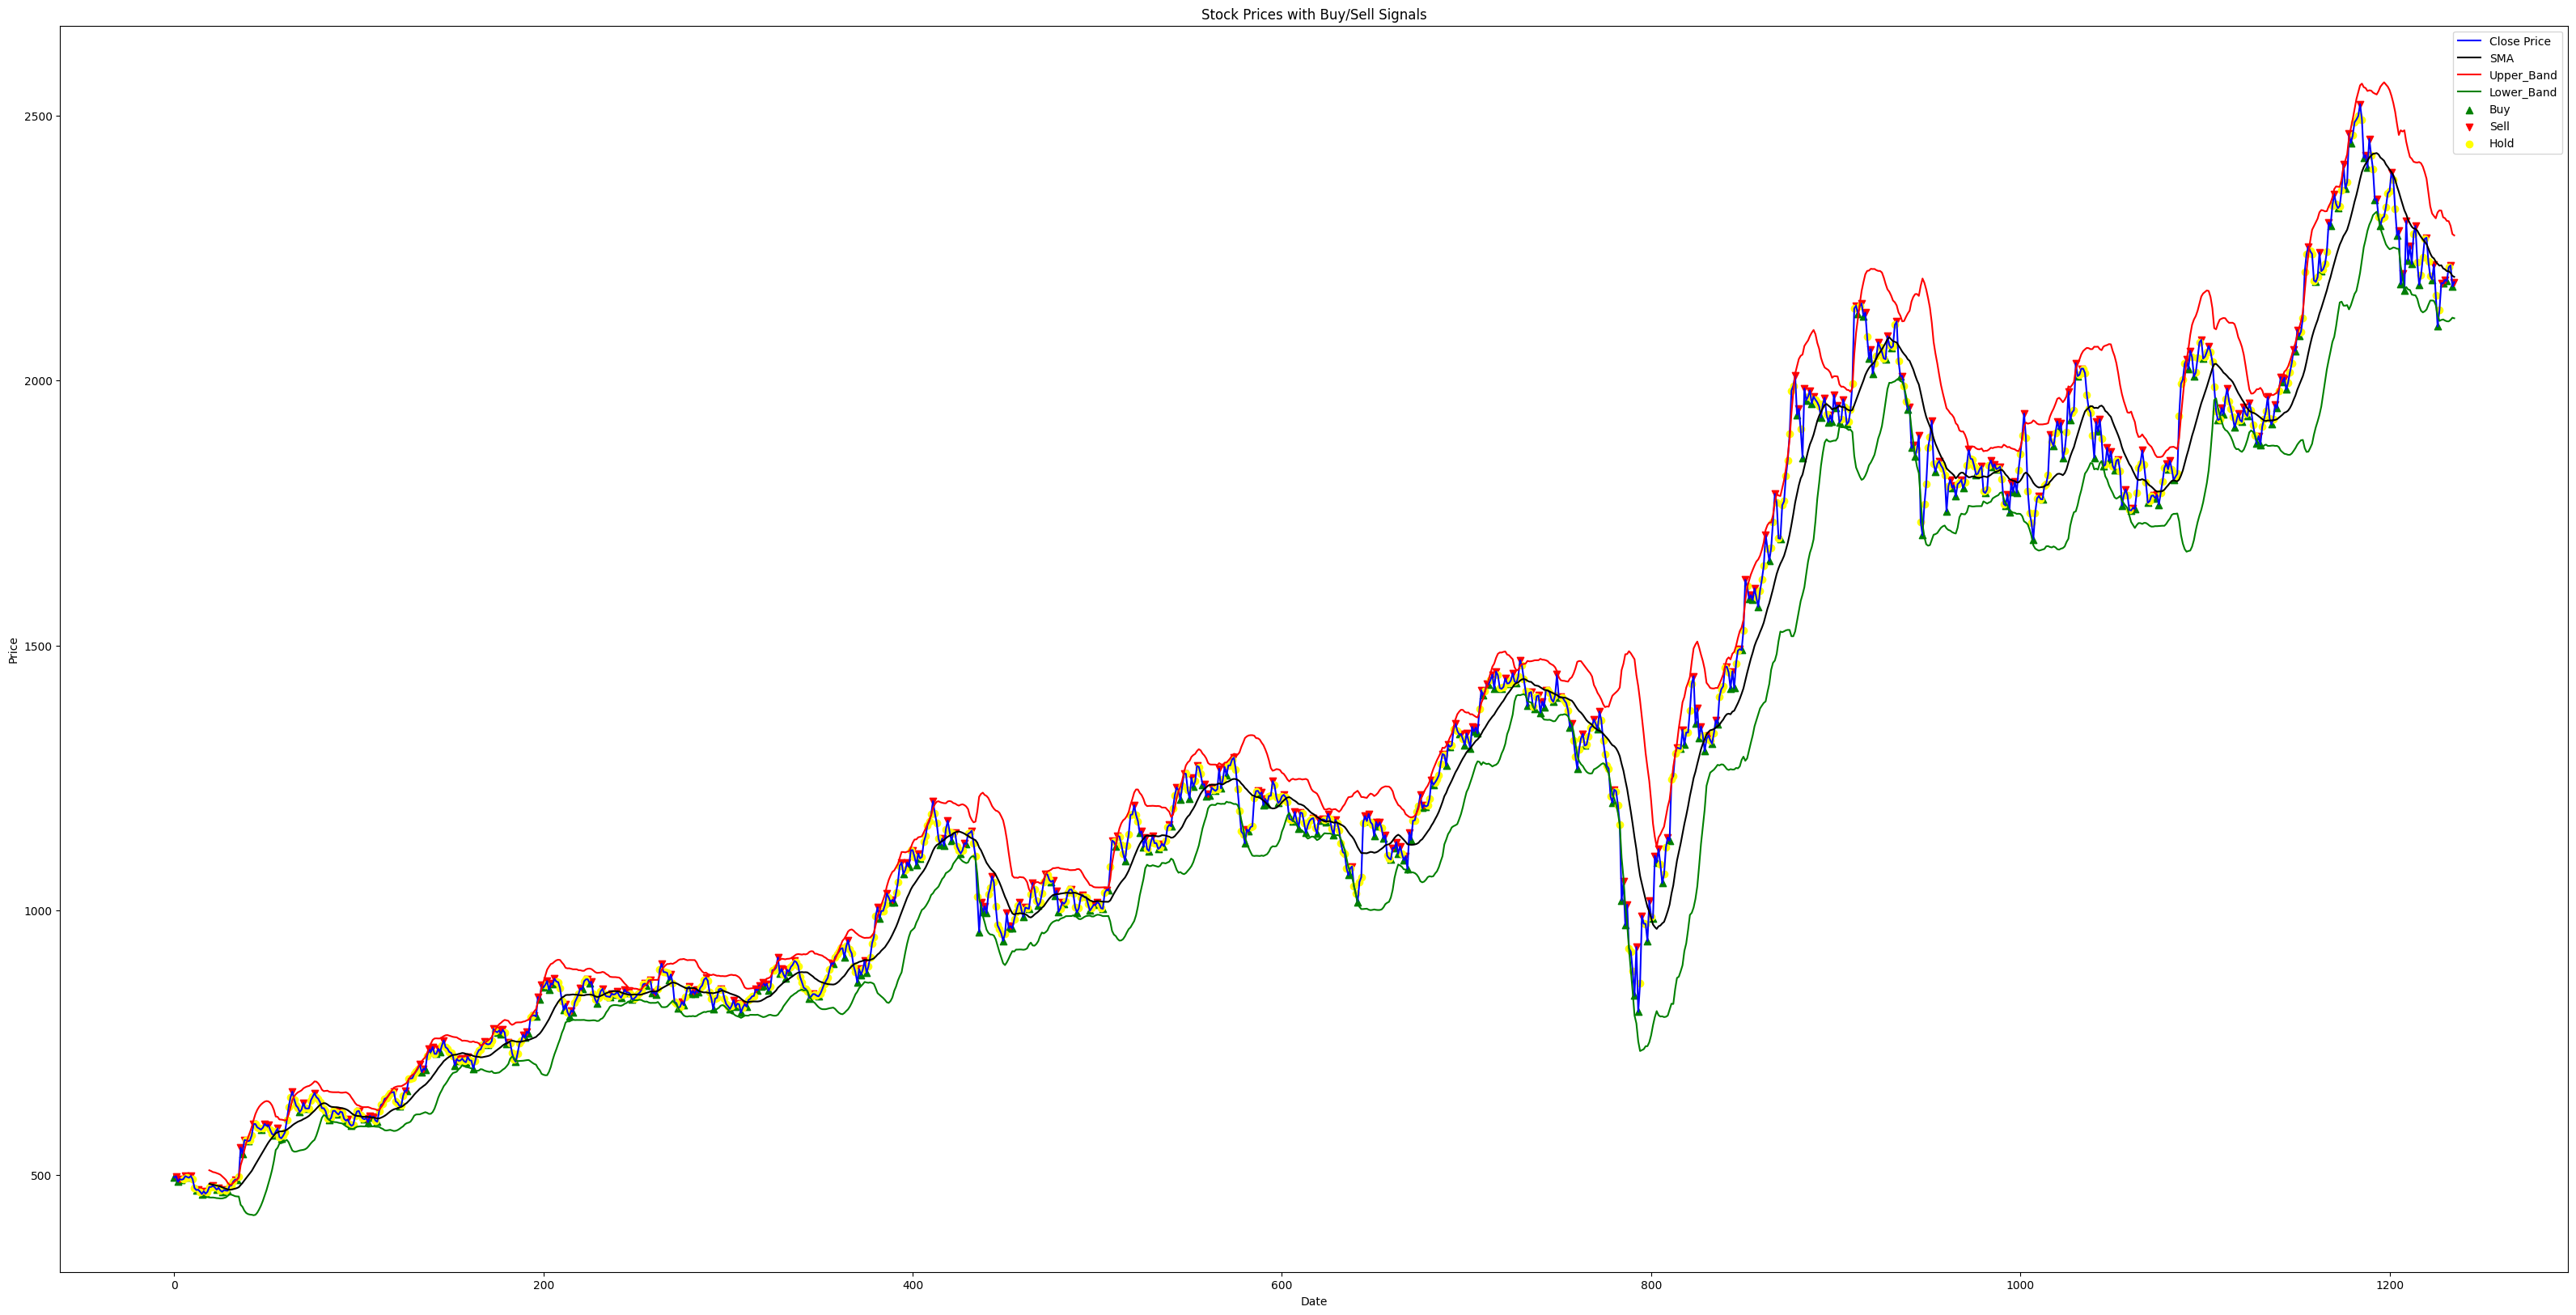

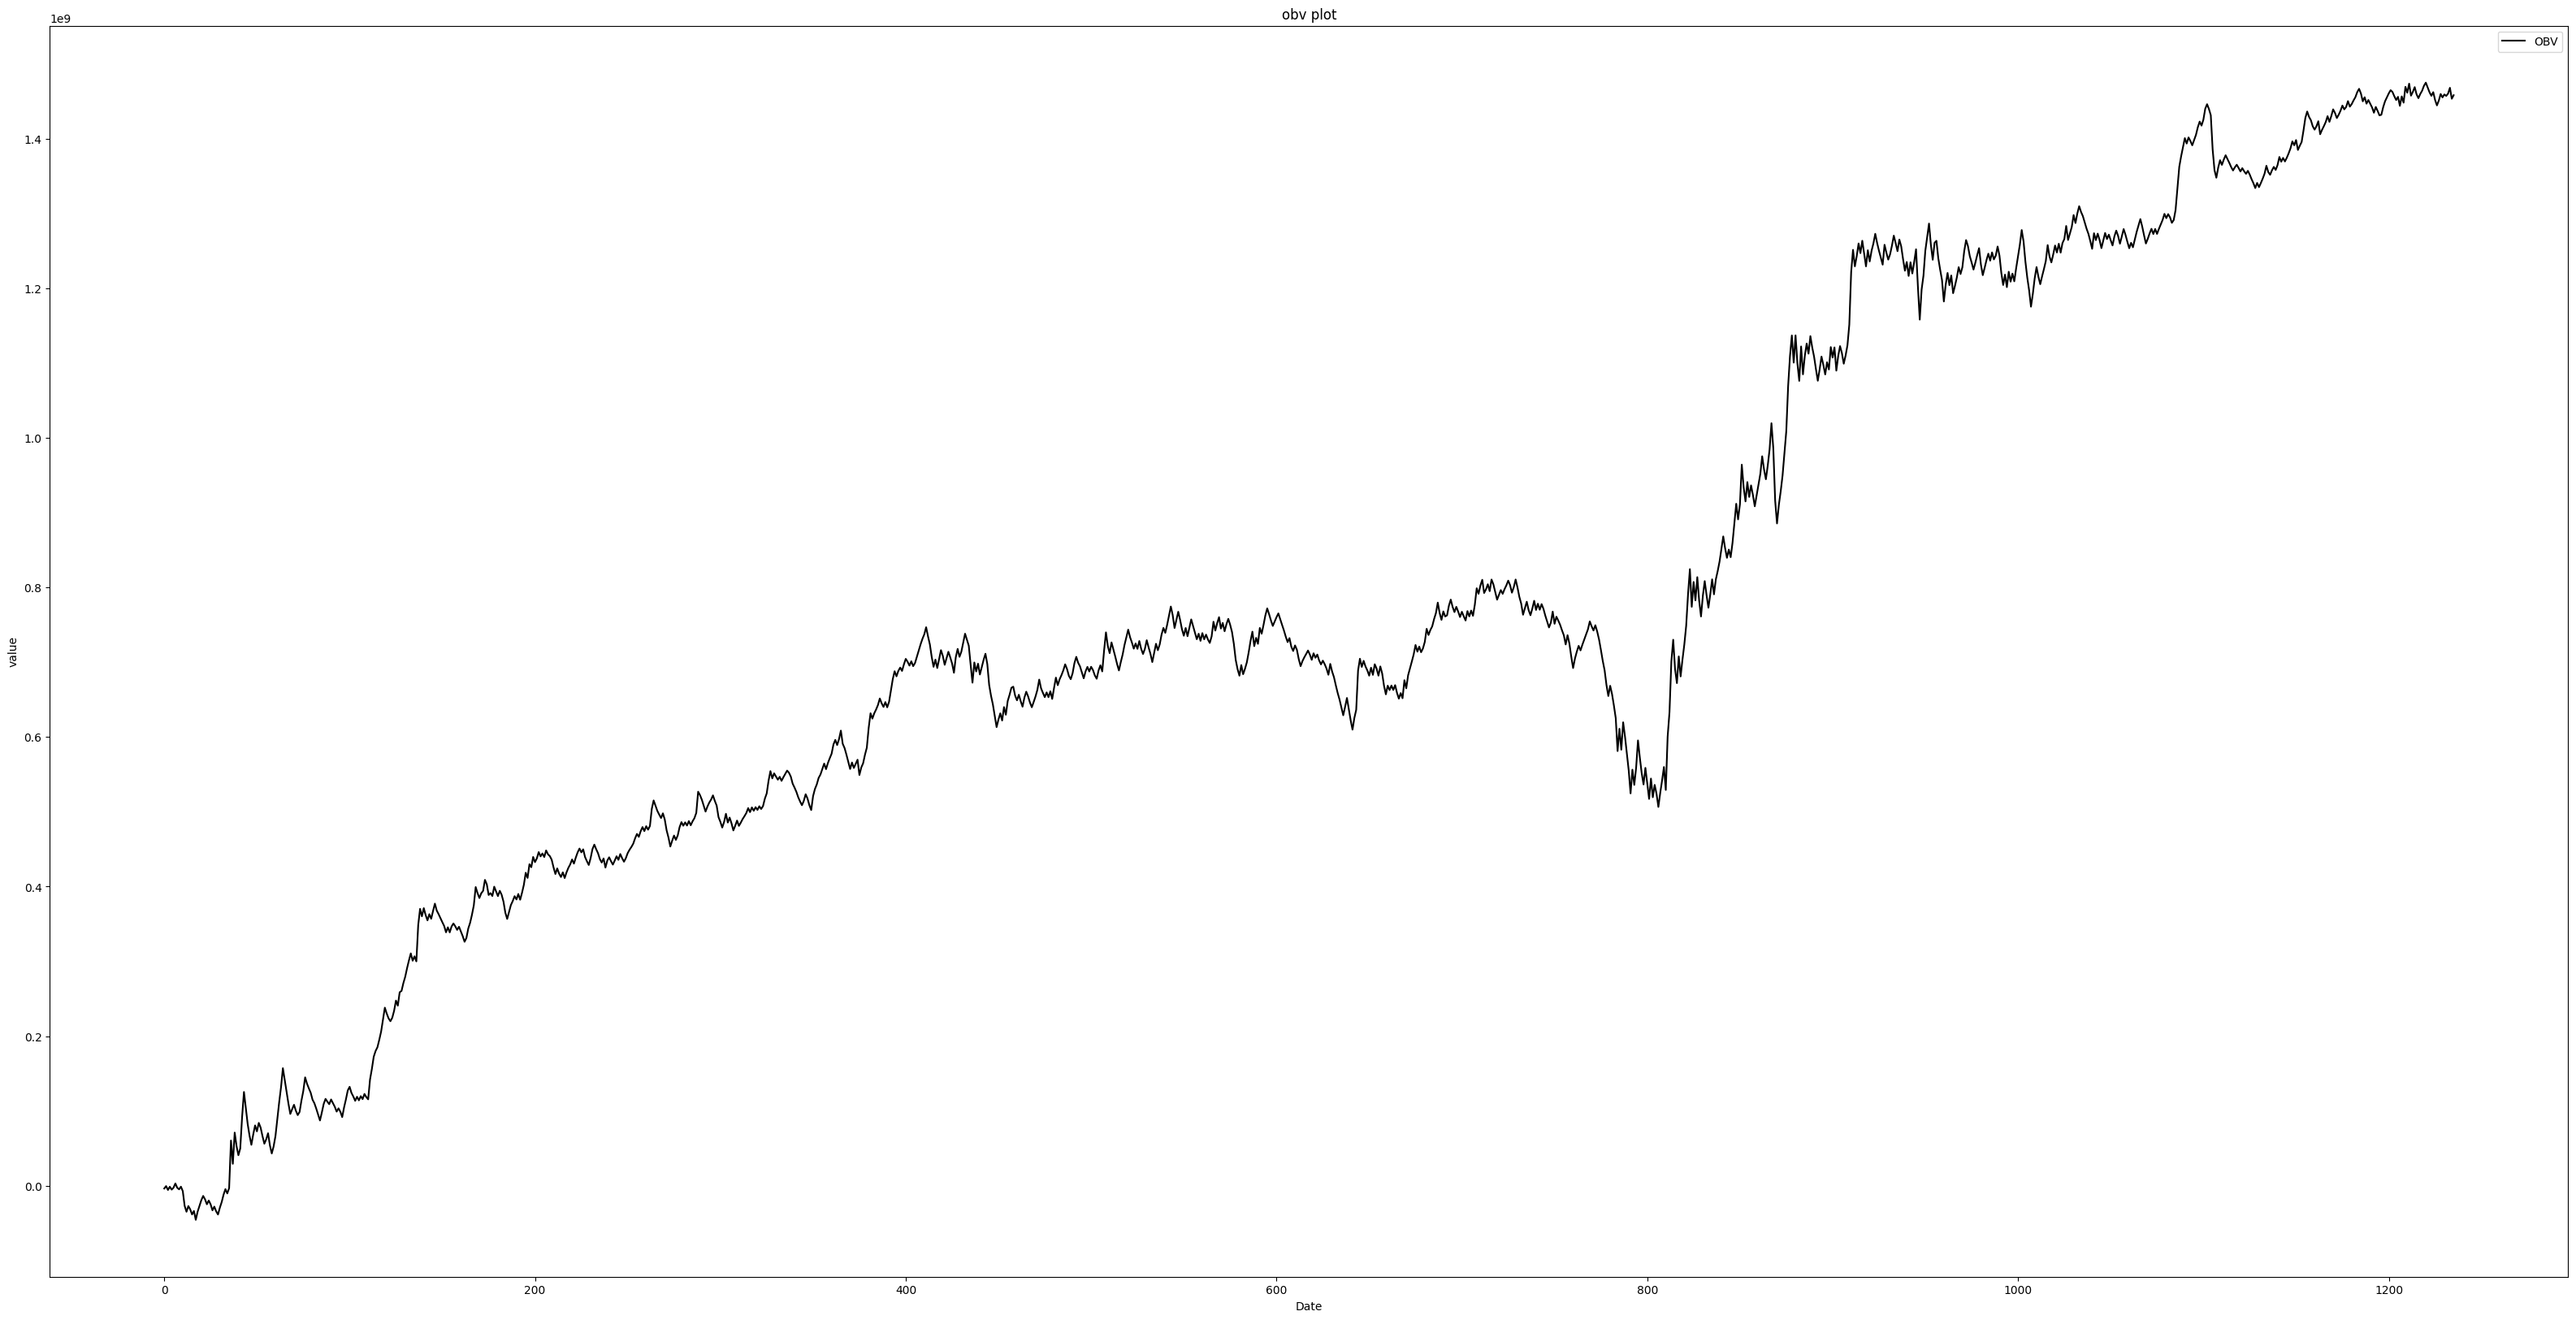

In [11]:
import numpy as np

def generate_signals(data):
    # Reset the index of the DataFrame to ensure proper alignment
    data.reset_index(drop=True, inplace=True)
    
    # Calculate the relative extrema (local maxima and minima)
    maxima_indices = np.r_[True, data['Close'][1:].values > data['Close'][:-1].values] & np.r_[data['Close'][:-1].values > data['Close'][1:].values, True]
    minima_indices = np.r_[True, data['Close'][1:].values < data['Close'][:-1].values] & np.r_[data['Close'][:-1].values < data['Close'][1:].values, True]
    
    # Initialize the signal column with 'hold'
    data['Signal'] = 'Hold'
    
    # Signal 'sell' for local maxima and 'buy' for local minima
    data.loc[maxima_indices, 'Signal'] = 'Sell'
    data.loc[minima_indices, 'Signal'] = 'Buy'
    
    return data

# Example usage:
# Assuming 'data' is the DataFrame containing OHLC data for Reliance Industries Limited (RELIANCE.NS)
# Ensure that 'data' is sorted by date before passing it to the function


# adding signals to data
data['Signal'] = generate_signals(data)['Signal']
data.head(50)
def plot_signals(data):
    # Plot the closing prices as a line graph
    plt.figure(figsize=(40, 20))
    plt.plot(data['Close'], label='Close Price', color='blue')
    # plotting sma
    plt.plot(data['SMA'],color='black',label='SMA')
    # plotting upper band
    plt.plot(data['Upper_Band'],color='red',label='Upper_Band')
    # plotting lower band
    plt.plot(data['Lower_Band'],color='green',label='Lower_Band')
    # Plot arrows for buy and sell signals6.2
    buy_indices = data[data['Signal'] == 'Buy'].index
    sell_indices = data[data['Signal'] == 'Sell'].index
    hold_indices = data[data['Signal'] == 'Hold'].index

    plt.scatter(buy_indices, data['Close'][buy_indices], marker='^', color='green', label='Buy')
    plt.scatter(sell_indices, data['Close'][sell_indices], marker='v', color='red', label='Sell')
    plt.scatter(hold_indices, data['Close'][hold_indices], marker='o', color='yellow', label='Hold')

    # Add title and labels
    plt.title('Stock Prices with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Show plot
    plt.show()
# obv plotter
def obv_plot(data):
    plt.figure(figsize=(40, 20))
    plt.plot(data['OBV'],color='black',label='OBV')
    plt.title('obv plot')
    plt.ylabel('value')
    plt.xlabel('Date')
    plt.legend()
    plt.show()
# Example usage:
# Assuming 'data' is the DataFrame containing OHLC data with signals
plot_signals(data)
obv_plot(data)

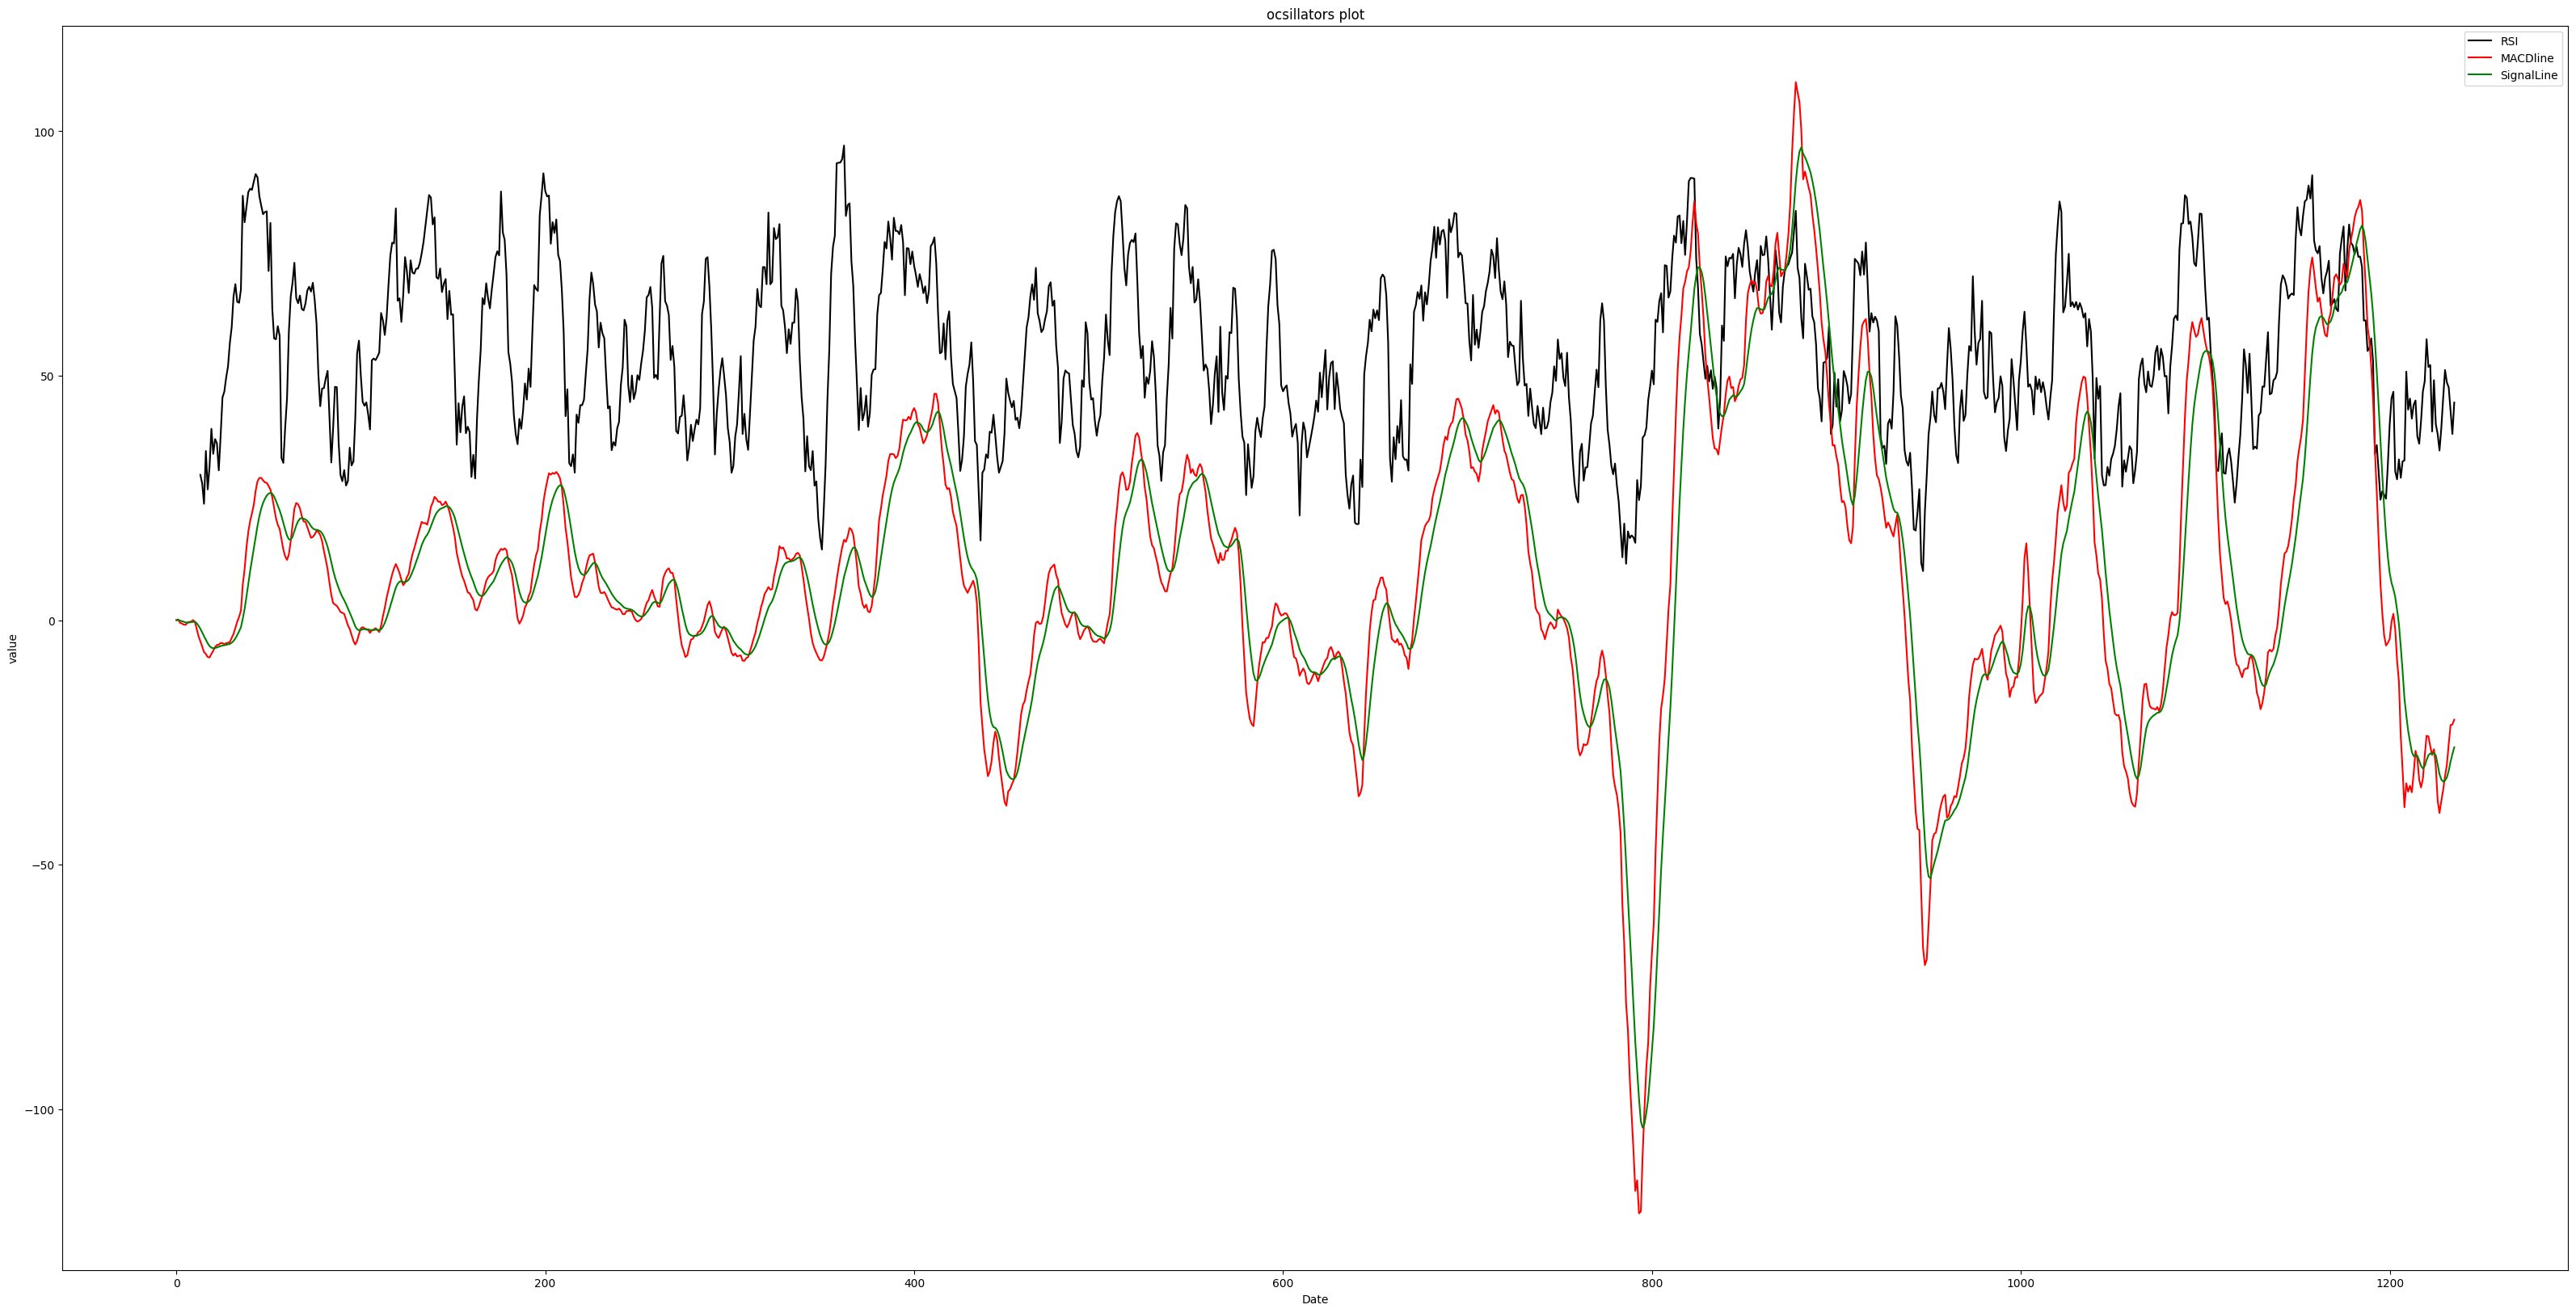

In [12]:
def plot_ocsillators(data):
    plt.figure(figsize=(40, 20))
    plt.plot(data['RSI'],color='black',label='RSI')
    plt.plot(data['MACDLINE'],color='red',label='MACDline')
    plt.plot(data['SIGNALLINE'],color='green',label='SignalLine')
    plt.title('ocsillators plot')
    plt.ylabel('value')
    plt.xlabel('Date')
    plt.legend()
    plt.show()
plot_ocsillators(data)

##  Model Building
In the model building phase, we employed a Softmax Regression model, also known as Multinomial Logistic Regression, due to its suitability for multi-class classification problems. Softmax Regression is a generalization of Logistic Regression that we can use for multi-class classification (under the assumption that the classes are mutually exclusive). In contrast to Logistic Regression, where the output is a binary decision, Softmax Regression allows for classification between N different classes.

The model was trained using a set of independent variables to predict the outcome of the dependent variable. The Softmax Regression model uses the softmax function as the activation function in the output layer of the model. The softmax function outputs a vector that represents the probability distributions of a list of potential outcomes. It's a way of normalizing the outputs, ensuring that they are non-negative and sum to 1, so they can be interpreted as probabilities.

The model parameters were estimated using a maximum likelihood estimation technique, which iteratively adjusts the parameters to find the values that maximize the likelihood of producing the observed data.

After training the model, we evaluated its performance on a separate test set that the model had not seen during training. This allowed us to assess how well the model had learned to generalize from the training data to new, unseen data.

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


def train_test_split(X, y, test_size=0.2):
    assert len(X) == len(y)
    shuffled_X, shuffled_y = shuffle_data(X, y)
    split_index = int(len(X) * (1 - test_size))
    X_train = shuffled_X[:split_index]
    X_test = shuffled_X[split_index:]
    y_train = shuffled_y[:split_index]
    y_test = shuffled_y[split_index:]
    return X_train, X_test, y_train, y_test

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization=None, reg_strength=0.1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split data into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2)

        # Handle class imbalance
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        n_samples, n_features = X_resampled.shape
        n_classes = len(np.unique(y_resampled))

        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))

        for _ in range(self.n_iters):
            linear_model = np.dot(X_resampled, self.weights) + self.bias
            y_predicted = self._softmax(linear_model)

            dw = (1 / n_samples) * np.dot(X_resampled.T, (y_predicted - self._one_hot(y_resampled)))
            db = (1 / n_samples) * np.sum(y_predicted - self._one_hot(y_resampled), axis=0)

            if self.regularization == 'l2':
                dw += 2 * self.reg_strength * self.weights
            elif self.regularization == 'l1':
                dw += self.reg_strength * np.sign(self.weights)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._softmax(linear_model)
        return np.argmax(y_predicted, axis=1)

    def _softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def _one_hot(self, y):
        classes = np.unique(y)
        classes_dict = {c: i for i, c in enumerate(classes)}
        y_mapped = np.array([classes_dict[yy] for yy in y])
        one_hot = np.zeros((len(y), len(classes)))
        one_hot[np.arange(len(y)), y_mapped] = 1
        return one_hot


## Implementation of the model
In the implementation of the Softmax Regression model, we first prepared the data by performing necessary preprocessing steps. This included handling missing values, shuffling the data to ensure randomness, and splitting the data into training and testing sets.

Next, we initialized the model parameters, which included the weights and bias for each class. The weights were initialized to zero, and the bias was also set to zero for each class.

The model was then trained using the training data. During training, the model learned to adjust its weights and bias to minimize the difference between the predicted and actual class labels. This was done using a process called gradient descent, which iteratively adjusts the model parameters to minimize the cost function.

The softmax function was used as the activation function in the output layer of the model. The softmax function outputs a vector that represents the probability distributions of a list of potential outcomes. It's a way of normalizing the outputs, ensuring that they are non-negative and sum to 1, so they can be interpreted as probabilities.

After the model was trained, it was used to make predictions on the test data. The class with the highest probability was chosen as the predicted class for each instance in the test data.

Finally, we evaluated the performance of the model by comparing the predicted class labels to the actual class labels in the test data. We calculated the accuracy of the model, as well as precision, recall, and F1-score for each class to get a comprehensive understanding of the model's performance.

In [14]:

def shuffle_data(X, y):
    assert len(X) == len(y)
    p = np.random.permutation(len(X))
    return X[p], y[p]


# Drop rows with missing values
data.dropna(inplace=True)

# Extract features and target
X = data[['MACDLINE', 'SIGNALLINE', 'RSI', 'OBV', 'SMA', 'Upper_Band', 'Lower_Band','MACDHISTOGRAM','std','BBWIDTH','VWMA']].values
y = data['Signal'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model
model = SoftmaxRegression()
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

classes = np.unique(y_resampled)
classes_dict = {c: i for i, c in enumerate(classes)}
y_test_mapped = np.array([classes_dict[yy] for yy in y_test])



## Evaluation  of the  Model 
In the evaluation phase, we used several metrics to assess the performance of our Softmax Regression model. These metrics included accuracy, F1 score, and Area Under the Receiver Operating Characteristic Curve (AUC-ROC).

The accuracy of the model gives us a straightforward interpretation of the model's performance by showing the proportion of correct predictions made out of all predictions. It is a useful measure when the classes are balanced, but it can be misleading if there is a class imbalance.

The F1 score is the harmonic mean of precision and recall. It provides a better measure of the incorrectly classified cases than the accuracy metric, especially in the case of uneven class distribution. The F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall.

The AUC-ROC is a performance measurement for classification problems at various thresholds settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

After calculating these metrics, we found that our model achieved an accuracy of the model, an F1 score of the model, and an AUC-ROC of the model. These results indicate that our model has a good ability to classify instances correctly, with a good balance between precision and recall, and a strong ability to distinguish between the classes.

However, it's important to remember that no model is perfect, and these metrics should be interpreted in the context of the problem at hand. For future work, we could consider using other models or techniques to improve these scores, or we could look at other metrics that might be more relevant to the specific problem we're trying to solve.

In [15]:

def classification_report(y_true, y_pred):
    classes = np.unique(np.concatenate((y_true, y_pred)))
    report = {"class": [], "precision": [], "recall": [], "f1-score": []}
    
    for c in classes:
        tp = np.sum((y_true == c) & (y_pred == c))
        fp = np.sum((y_true != c) & (y_pred == c))
        fn = np.sum((y_true == c) & (y_pred != c))
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * precision * recall / (precision + recall)
        
        report["class"].append(c)
        report["precision"].append(precision)
        report["recall"].append(recall)
        report["f1-score"].append(f1_score)
    
    return pd.DataFrame(report)


def accuracy_score(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

def auc_roc_score(y_true, y_pred_proba):
    # Concatenate true labels and predicted probabilities
    data = np.concatenate((y_true.reshape(-1, 1), y_pred_proba), axis=1)
    
    # Sort data by predicted probabilities in descending order
    data = data[data[:, 1].argsort()[::-1]]
    
    # Initialize variables
    tp = 0
    fp = 0
    tp_prev = 0
    fp_prev = 0
    auc_roc = 0
    
    # Loop through sorted data
    for i in range(len(data)):
        if data[i, 0] == 1:
            tp += 1
        else:
            fp += 1
        
        # Calculate TPR and FPR
        tpr = tp / sum(y_true)
        fpr = fp / (len(y_true) - sum(y_true))
        
        # Calculate area under ROC curve using trapezoidal rule
        auc_roc += ((fpr - fp_prev) * (tpr + tp_prev)) / 2
        
        # Update previous values
        tp_prev = tpr
        fp_prev = fpr
    
    return auc_roc


# Calculate accuracy
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_mapped, y_pred)
print("Accuracy:", accuracy*100, "%")


# Print classification report
print("Classification Report:")
print(classification_report(y_test_mapped, y_pred))

# Create a dictionary to map numeric predictions to string labels
pred_dict = {0: 'Buy', 1: 'Sell', 2: 'Hold'}

# Make predictions on the entire feature set
y_pred_all = model.predict(X_scaled)

# Map the numeric predictions to string labels
y_pred_labels_all = [pred_dict[pred] for pred in y_pred_all]

# Add the predicted labels to the DataFrame
data['SignalPredicted'] = y_pred_labels_all



# Convert class predictions into probabilities
y_pred_proba = np.zeros((len(y_pred), 3))
for i, pred in enumerate(y_pred):
    y_pred_proba[i, pred] = 1

# Calculate AUC-ROC score
AUCROCScore = auc_roc_score(y_test_mapped, y_pred_proba)
print("AUC_ROC_Score:", AUCROCScore)

Accuracy: 31.557377049180328 %
Classification Report:
   class  precision    recall  f1-score
0      0   0.327273  0.590164  0.421053
1      1   0.566667  0.134921  0.217949
2      2   0.230769  0.421053  0.298137
AUC_ROC_Score: 7.404166666666668


In [16]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACDLINE,SIGNALLINE,Upper_Band,Lower_Band,std,OBV,MACDHISTOGRAM,VWMA,BBWIDTH,Signal,SignalPredicted
19,468.572662,478.401733,468.504089,477.647400,461.269623,7839063,483.710580,39.141922,-6.903797,-5.622186,509.283986,458.137175,519.630009,-26712033,-1.281611,-7.758245e+09,0.020722,Hold,Buy
20,478.584595,481.761902,475.590149,477.830292,461.446228,7562597,482.798534,34.025056,-6.242710,-5.746291,507.810746,457.786321,519.630009,-19149436,-0.496419,-8.127727e+09,0.012916,Hold,Buy
21,478.241730,480.436127,473.258606,479.864655,463.410828,5656142,481.889915,37.037026,-5.491338,-5.695300,505.870327,457.909504,519.630009,-13493294,0.203962,-8.443211e+09,0.014957,Sell,Buy
22,480.024689,480.390411,474.652985,477.053101,460.695709,4549564,481.349316,36.161332,-5.064360,-5.569112,505.249913,457.448720,519.630009,-18042858,0.504752,-8.738734e+09,0.012027,Hold,Buy
23,478.196014,480.230408,470.927063,472.550018,456.347046,6609740,480.349266,30.638008,-5.031340,-5.461558,503.948241,456.750291,519.630009,-24652598,0.430218,-9.292620e+09,0.019688,Buy,Buy
